#The perception of textual, visual, and auditory data and their influence on choices

By : Nidhi Srinath

The goal of this notebook is to import necessary packages and load the required datasets into the notebook. Further, the data will be processed to find insights about the quality of the features and to understand what modeling process would work best with them. The dataset can be found using [this link](https://osf.io/49v5z/) and the reference paper can be [ found here.](https://doi.org/10.1177/09567976221106349)

In [62]:
# Importing the necessary packages
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical Packages
from scipy import stats

# Regression models
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

For this project, I will be using one of the datasets associated with the paper, namely, Study 1b.

In [63]:
df = pd.read_csv('Study1b_reduced.csv',index_col = 'ID')
df.head()

,Mode,Auditory,Gender,Age_1,competence,intelligence,thoughtful,composite_intellect,humanness,novel,unique,composite_novelty,Stimulus,RecommendationFollowed
ID,,,,,,,,,,,,,,
1,Auditory-Computer,1,2,34,5,5,5,5.0,5,1,1,1.0,CreditCard,0
2,Visual-Handwritten,0,2,40,1,1,1,1.0,5,3,1,2.0,CreditCard,1
3,Auditory-Human,1,1,64,5,5,5,5.0,9,2,2,2.0,CreditCard,1
4,Auditory-Computer,1,1,39,2,2,2,2.0,7,2,2,2.0,CreditCard,0
5,Auditory-Human,1,2,39,5,5,5,5.0,4,1,5,3.0,CreditCard,1


The dataset uses some basic parameters such as ID, Gender, and Age to describe the participant. The remaining columns indicate the rating provided by the participant for certain recommendations on a scale of 1-9 (1 = strongly disagree, 9 = strongly agree).  The next few columns are a scale to rate the hummanness, novelty, and uniqueness of the speaker. The final column shows whether the participant followed the recommendation provided.

#### Checking for the general scope of variables in the datasets

In [64]:
(df[df.RecommendationFollowed == 1]).count()/df.count()

Mode                      0.470051
Auditory                  0.470051
Gender                    0.470051
Age_1                     0.470051
competence                0.470051
intelligence              0.470051
thoughtful                0.470051
composite_intellect       0.470051
humanness                 0.470051
novel                     0.470051
unique                    0.470051
composite_novelty         0.470051
Stimulus                  0.470051
RecommendationFollowed    0.470051
dtype: float64

In [65]:
# Checking for nulls in the dataset for the study 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4708 entries, 1 to 4708
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Mode                    4708 non-null   object 
 1   Auditory                4708 non-null   int64  
 2   Gender                  4708 non-null   int64  
 3   Age_1                   4708 non-null   int64  
 4   competence              4708 non-null   int64  
 5   intelligence            4708 non-null   int64  
 6   thoughtful              4708 non-null   int64  
 7   composite_intellect     4708 non-null   float64
 8   humanness               4708 non-null   int64  
 9   novel                   4708 non-null   int64  
 10  unique                  4708 non-null   int64  
 11  composite_novelty       4708 non-null   float64
 12  Stimulus                4708 non-null   object 
 13  RecommendationFollowed  4708 non-null   int64  
dtypes: float64(2), int64(10), object(2)
memo

<AxesSubplot:ylabel='ID'>

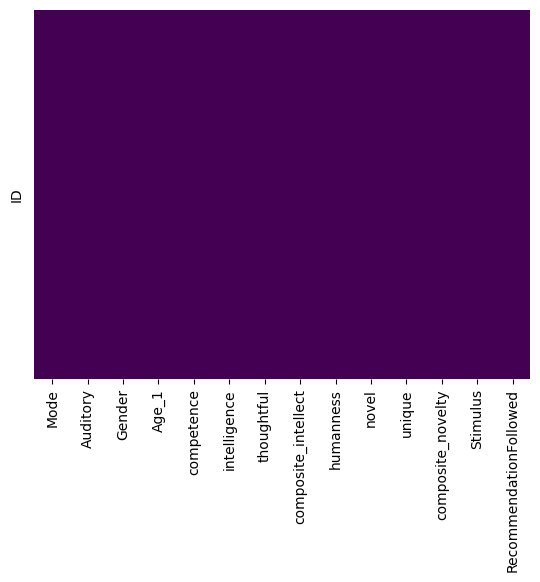

In [66]:
# Checking for nulls in the dataset
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The dataset is complete and well structured. Since there are no null values, the dataset is ready for exploratory data analytics


---

# Data Preprocessing









#### From our dataset, we want to analyse what factors cause people to take recommendations for certain stimuli. The target variable that we are working with is 'RecommendationFollowed' which is a binary categorical variable where 0 stands for recommendation not followed and 1 stands for recommendation followed. 

The correlation of every variable with every other variable in the dataset is checked to understand the effects of certain variables on the target.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

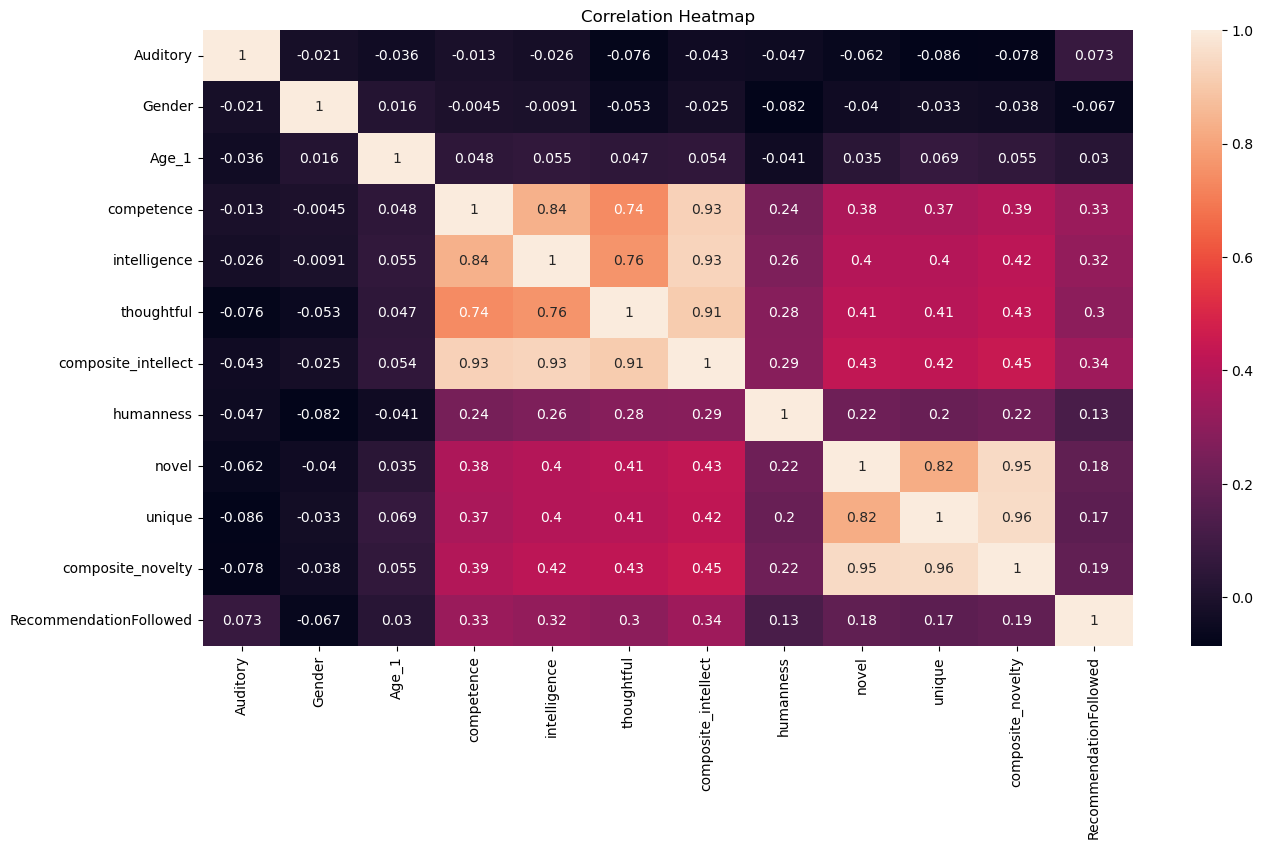

In [67]:
# Plotting the correlation matrix for the entire dataset
plt.figure(figsize = (15,8))
plt.title('Correlation Heatmap')
sns.heatmap(df.corr(), annot = True)

<AxesSubplot:title={'center':'Correlation Heatmap'}>

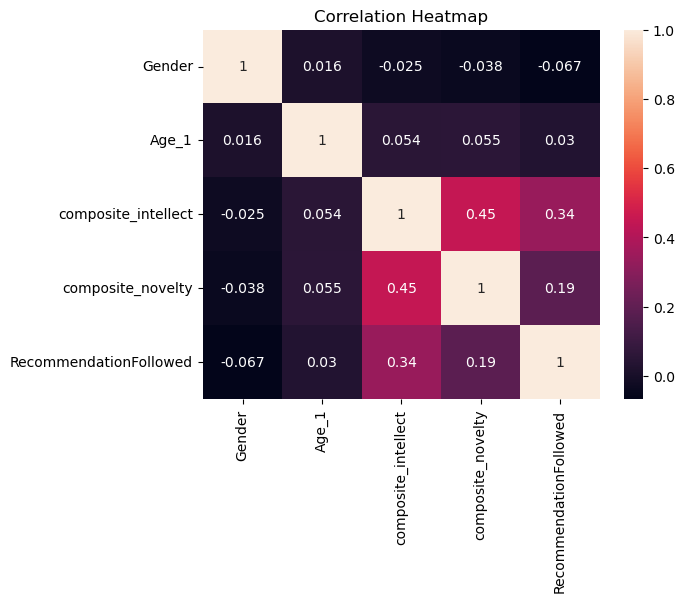

In [68]:
# Plotting the correlation matrix 
df1 = df[['Mode', 'Gender', 'Age_1', 'composite_intellect', 'composite_novelty', 'RecommendationFollowed']]
#plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap')
sns.heatmap(df1.corr(), annot = True)

From the above plot, we can see that competence, intelligence, thoughtfulness (combined to form the columne 'composite_intellect) all have a similar correlation on the target variable. 

<AxesSubplot:title={'center':'No. of recommendations accepted and rejected'}, xlabel='RecommendationFollowed', ylabel='count'>

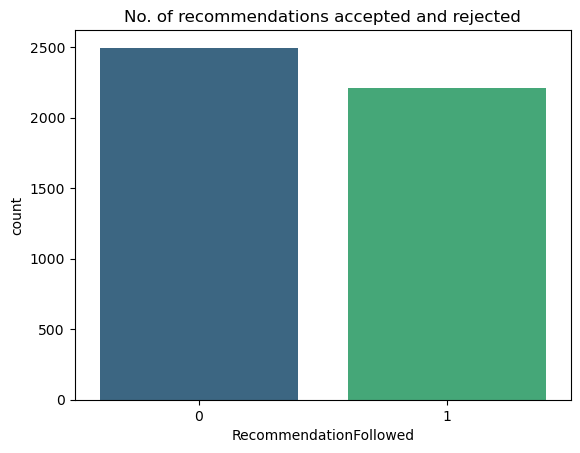

In [69]:
# Bar plot of the number of people who took the recommendations and did not
plt.title('No. of recommendations accepted and rejected')
sns.countplot(x='RecommendationFollowed', data = df, palette = 'viridis')

* 0 - Recommendation not followed
* 1 - Recommendation Followed

As seen in the plot above, more of the sample population has not taken the recommendation but the difference between the two values is not a lot. 

Further, we can check what the effect of certain correlating factors are on our target variable. Firstly, checking how gender plays a role on whether a participant took a recommendation or not 

<AxesSubplot:title={'center':'Gender based recommendation interaction'}, xlabel='RecommendationFollowed', ylabel='count'>

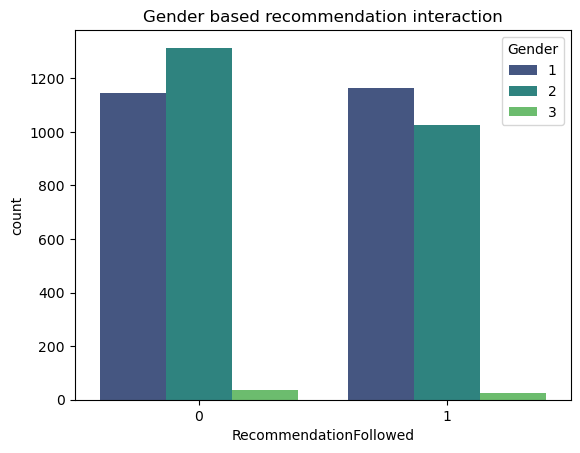

In [70]:
# Bar plot of the number of recommendations followed based on gender 
plt.title('Gender based recommendation interaction')
sns.countplot(x='RecommendationFollowed',hue = 'Gender', data=df,palette='viridis')

* 0 - Recommendation Not Followed
* 1 - Recomendation Followed
* Gender 1 - Male
* Gender 2 - Female
* Gender 3 - Other


The countplot shows us that more women did not follow the recommendation compared to the ones that followed the recommendation. The number of men and other people who followed and did not follow the recommendations are almost consisent.


Now we can check whether the mode of the recommendations, one of the most important factors that can explain a trend that causes more people to follow recommendations, has a significant effect on the whether the recommendations are followed

<AxesSubplot:title={'center':'Mode and Recommendation Interaction'}, xlabel='RecommendationFollowed', ylabel='count'>

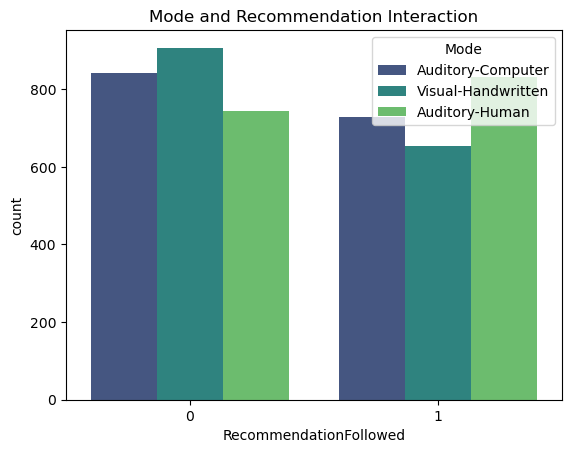

In [71]:
# Bar plot of the number of recommendations followed based on mode of recommendation 
plt.title('Mode and Recommendation Interaction')
sns.countplot(x='RecommendationFollowed',hue = 'Mode', data=df,palette='viridis')

Based on the above graph we can see the number of people who followed auditory-computer and visual-handwritten recommendations are lesser than those who did not. More people followed auditory-human recommendations than the people that did not follow auditory-human recommendations

We can also check how the stimulus of the recommendations affect the target values 0 and 1


<AxesSubplot:title={'center':'Stimulus and Recommendation Interaction'}, xlabel='RecommendationFollowed', ylabel='count'>

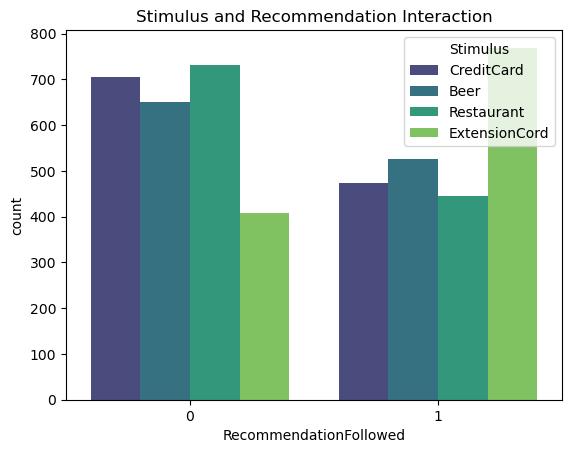

In [72]:
# Bar plot of the number of recommendations followed based on the stimulus
plt.title('Stimulus and Recommendation Interaction')
sns.countplot(x='RecommendationFollowed',hue = 'Stimulus', data=df,palette='viridis')

We can see that more people did not follow the recommendation when the stimulus was Credit Card, Beer, and Restaurants. The number of people that followed the recommendations for the extension cord was more than the ones that did not follow the recommendation. Intuitively, this feels like a stimulus that more people would need recommendations for. 

We can now check what percent of the participants followed the recommendations for each mode of recommendation based on the kind of stimulus

<AxesSubplot:title={'center':'Stimulus, Mode, and Recommendation Interaction'}, xlabel='Stimulus', ylabel='RecommendationFollowed'>

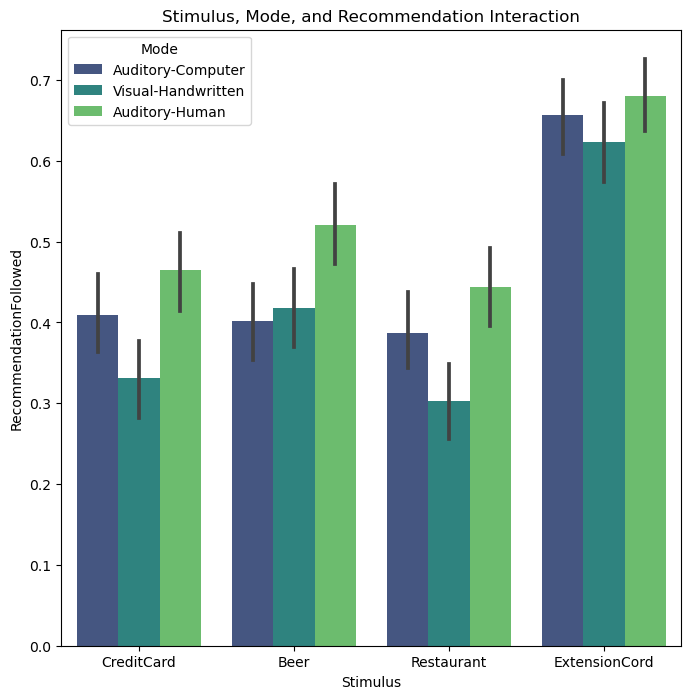

In [73]:
# Bar plot to indicate what percent of the participants followed recommendations for each type of mode
plt.figure(figsize=(8,8))
plt.title('Stimulus, Mode, and Recommendation Interaction')
sns.barplot(y='RecommendationFollowed', x= 'Stimulus', hue='Mode', data = df, palette = 'viridis')

To get further insight on the audience that participated in the survey, we can check a distribution of the age of the audience. 

In [74]:
# Statistical features of the age of the participants
df['Age_1'].describe()

count    4708.000000
mean       31.187766
std        11.804134
min        18.000000
25%        22.000000
50%        28.000000
75%        36.000000
max        78.000000
Name: Age_1, dtype: float64

<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age_1', ylabel='Count'>

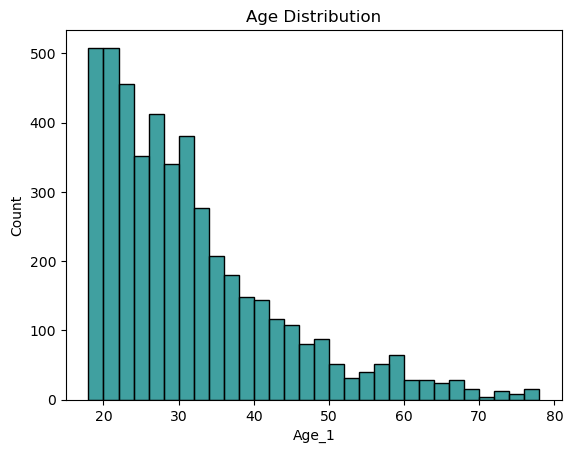

In [75]:
# Distplot to show the distribution of age of the participants
plt.title('Age Distribution')
sns.histplot(df['Age_1'] ,kde=False, color='teal', bins=30)

The age range of the participants lies between 18 and 78. More people that participated fall in the age range of 18-25.

#### The nature of the survey requires the participants to rate the recommendations on a scale of 1-9 (strongly disagree - strongly agree) based on various factors. Two of the composite scores attribute for the average of these scores.


**Composition Intellect**

Composition intellect is a composite score for intelligence, competence, and thoughtfulness. 


**Composite novelty**

The composite_novelty score is an average of the novelty, humanness, and uniquess scores given by the participants. We can check the distributions  of this variable

In [76]:
# Statistical features of composite_intellect
df['composite_intellect'].describe()

count    4708.000000
mean        5.617106
std         1.808920
min         1.000000
25%         4.666667
50%         5.666667
75%         7.000000
max         9.000000
Name: composite_intellect, dtype: float64

In [77]:
# Statistical features of composite_novelty
df['composite_novelty'].describe()

count    4708.000000
mean        4.943076
std         2.260624
min         1.000000
25%         3.000000
50%         5.000000
75%         6.500000
max         9.000000
Name: composite_novelty, dtype: float64

ValueError: If using all scalar values, you must pass an index

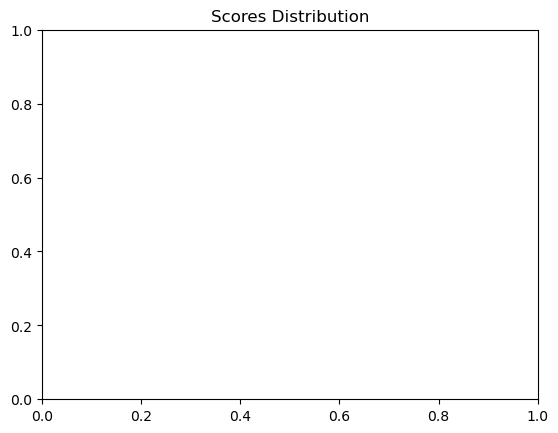

In [78]:
# Density distribution of the variable
plt.title('Scores Distribution')
sns.kdeplot(df[['composite_intellect', 'composite_novelty']], fill = True)

Both composite scores do not follow a normal distribution which means that the data does not follow a typical bell curve and there is not a lot of symmetry in the values. Although at this point, these measures may not seem like they are directly relevant to the target variable, their interactions might determine why a person chose to follow a recommendation

##Statistical Modeling
---
Our data has a categorical binary variable as a target variable, with a bunch of scores and the mode of recommendations as independent variables which will determine whether or not the recommendation is being followed. 

To model this kind of data, I have chosen to work with **logistic regression**. Logistic Regression is one of the most commonly used binary classification algorithms. 

Depending on the factors being used for the modeling process, logistic regression model can perform with increased accuracy. 

For the first round of modeling, I have chosen to simply stick with the mode column which indicates the mode of recommendation. Depending on the AIC scores of this initial model, the variables can be finalised. 

In [ ]:
# Logistic GLM model 
f = 'RecommendationFollowed ~ 1 + Mode'
response, predictors = dmatrices(f, df, return_type='dataframe')
response = df['RecommendationFollowed']
logistic_result = sm.GLM(response, predictors, family=sm.families.Binomial()).fit()

In [ ]:
# Predicting with the logistic model
logistic_result.predict()
print(logistic_result.summary())

In [ ]:
# Plot to visualize the model
df['Logistic_Prediction'] = logistic_result.predict()

fig, ax = plt.subplots(figsize=(5,5))
sns.pointplot(data=df, x='RecommendationFollowed', y='Logistic_Prediction',
              color='navy', ax=ax)
plt.title('Logistic Regression Model 1')
plt.show()

In [ ]:
print(logistic_result.aic)

Firstly, the `coefficient` of the `auditory human` recommendations is 0.2545 which means that for every 1 unit increase in the auditory human recommendation, there is an increase of 0.2545 chances of recommendations being followed. The `p-value` of this is 0.00 which implies that there is a significance. 

The `coefficient` of `visual handwritten` mode is -0.1833 which means that for every 1 unit increase in visual handwritten recommendation, there is a decrease of 0.1833 chance of recommendations being followed. The `p-value` for this variable is 0.011 which implies that there is some signficance associated to this variable

The `AIC Score` for the model is 6478.16 which is a pretty large value. This implies that we can improve our model to further reduce these values.

---
For the next model, I have chosen to work with the mode along with the `composite_intellect` and `composite_novelty` scores to predict the target variable. 




In [ ]:
# logistic GLM model
f = 'RecommendationFollowed ~ 1 + Mode + composite_intellect + composite_novelty'
response, predictors = dmatrices(f, df, return_type='dataframe')
response = df['RecommendationFollowed']
logistic_result = sm.GLM(response, predictors, family=sm.families.Binomial()).fit()

In [ ]:
# Predicting with the logistic model
logistic_result.predict()
print(logistic_result.summary())

In [ ]:
# Plot to visualize the model
df['Logistic_Prediction'] = logistic_result.predict()

fig, ax = plt.subplots(figsize=(5,5))
sns.pointplot(data=df, x='RecommendationFollowed', y='Logistic_Prediction',
              color='purple', ax=ax)
plt.title('Logistic Regression Model 2')
plt.show()

In [ ]:
print(logistic_result.aic)

The results above indicate that based on the baseline auditory-computer values, both auditory human and visual handwritten are negatively correlated. 

The `AIC Score` is an indication that the modeling parameters are better at prediction than the previous model. The score has significantly reduced, but is still quite high!

The r squared value has increased in the second model which also indicates that the model is fitting the data better. 

Futher, including the stimulus data to the model could improve the model performance. Based on the mode, stimulus, and recommendation figure as seen above, I will be modeling the data using just the extension chord as the stimulus (most commonly followed recommendation)

In [ ]:
# Creating a new dataframe containing just the extension cord 
new_df = df[df.Stimulus =='ExtensionCord'].copy()
new_df.head()

Now that the dataframe has been reduced to just extension cord as the stimulus, the model can now be built using the stimulus.

In [ ]:
f = 'RecommendationFollowed ~ 1 + Mode + composite_intellect + composite_novelty + Stimulus'
response, predictors = dmatrices(f, new_df, return_type='dataframe')
response = new_df['RecommendationFollowed']
logistic_result = sm.GLM(response, predictors, family=sm.families.Binomial()).fit()

In [ ]:
# Predicting with the logistic model
logistic_result.predict()
print(logistic_result.summary())

The above results are interpreted for extension cord as a stimulus. The extension cord along with recommendation followed can be considered as the baseline measurements for this model. The model predictions show that the modes have a negative correlation but the composite scores have a positive correlation. The composite novelty seems to have no significant effect since the p value > 0.05. Overall, if a recommendation for an extension cord is followed we see a lower composite_intellect score. The opposite of this is shown in the model results. 

In [ ]:
# Plot to visualize the model
new_df['Logistic_Prediction'] = logistic_result.predict()

fig, ax = plt.subplots(figsize=(5,5))
sns.pointplot(data= new_df, x='RecommendationFollowed', y='Logistic_Prediction',
              color='teal', ax=ax)
plt.title('Logistic Regression Model 3')
plt.show()

Splitting the visualization based on the different modes of communication can help analyse the predictions for each mode better.

In [ ]:
new_df['Logistic_Prediction'] = logistic_result.predict()
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.stripplot(data = new_df[new_df.Mode == 'Auditory-Human'], x= 'RecommendationFollowed', y = 'Logistic_Prediction', color = 'gray', alpha = 0.2, ax = axes[1])
sns.stripplot(data = new_df[new_df.Mode == 'Auditory-Computer'], x= 'RecommendationFollowed', y = 'Logistic_Prediction', color = 'gray', alpha = 0.2, ax = axes[0])
sns.stripplot(data = new_df[new_df.Mode == 'Visual-Handwritten'], x= 'RecommendationFollowed', y = 'Logistic_Prediction', color = 'gray', alpha = 0.2, ax = axes[2])

sns.pointplot(data = new_df[new_df.Mode =='Auditory-Computer'], x='RecommendationFollowed', y='Logistic_Prediction',
              color='teal', ax=axes[0])
sns.pointplot(data = new_df[new_df.Mode =='Auditory-Human'], x='RecommendationFollowed', y='Logistic_Prediction',
              color='teal', ax=axes[1])
sns.pointplot(data= new_df[new_df.Mode =='Visual-Handwritten'], x='RecommendationFollowed', y='Logistic_Prediction',
              color='teal', ax=axes[2])

# Setting title for each of the subplots
axes[0].set_title('Auditory Computer')
axes[1].set_title('Auditory Human')
axes[2].set_title('Visual Handwritten')

plt.show()


In [ ]:
print(logistic_result.aic)

The results of the final model indicate a lower pseudo-r2 value but a higher AIC score which means that the final model captures the data better than the previous models. 